In [24]:
import numpy as np

class Model:

    processNum: int
    resourceDevice = (8 * 128^2 * 10 + 8^2)

    width: int
    height: int
    neighborNum: int
    obstacleNum: float
    fvary: bool

    def __init__(self, processNum, width, height, neighborNum, obstacleNum, fvary = False) -> None:
        self.processNum = processNum
        self.width = width
        self.height = height
        self.neighborNum = neighborNum
        self.obstacleNum = obstacleNum
        self.fvary = fvary
    
    def sortingNetworkSize(self):
        return (2.367124*self.width + 0.950211*self.height - 0.055066*self.obstacleNum)/self.processNum\
            + 0.213089*self.height + 0.003213*self.width*self.height
            #後ろの項は影響小さめなので無視して良さそう
    
    def iterNum(self):
        return (self.height - 1) * 1.005871 + (204.236708 * self.obstacleNum/(self.width*self.height))/self.processNum 
    
    def instCore(self):
        constant = 1
        return np.log2(self.sortingNetworkSize()) + self.neighborNum * constant
    
    def resourceCore(self):
        constant = 7*10/(128*128)
        return pow(self.sortingNetworkSize(), 2) * constant
        #128^2*C1 : C2 = 10:1

    def resourceNetwork(self):
        constant = 7
        return self.processNum*self.processNum * constant

    def resourceAll(self):
        return self.resourceCore() * self.processNum + self.resourceNetwork()
        # ((2.367124*width + 0.950211*height - 0.055066*obstacleNum)/processNum)^2 * 10/128*128 * processNum = C/processNum
        # processNum^2 * constant

        # R_device = (C1/processNum + processNum^2 * C2) * C3
        # processNum*R_device/C3 = C1 + processNum^3 * C2
        # processNum * R_device/C3 - processNum^3 * C2 - C1= 0 
        # processNum * (R_device/C3 - processNum^3 * C2)


    def fmax(self):
        if self.fvary:
            constant = 1
            return constant / (self.resourceAll() / self.resourceDevice)
        else:
            return 1

        # =C4*Rdevice/(C1/processNum + processNum^2 * C2) * C3

    # constraint
    def isValid(self)->bool:
        return self.resourceDevice >= self.resourceAll()

    # object
    def calcTime(self):
        return self.instCore() * self.iterNum() / self.fmax()
        # log2(2.367124*self.width + 0.950211*self.height - 0.055066*obstacleNum) + neightNum*C - log2(self.processNum) = C5 - log2(processNum)
        # (self.height - 1) * 1.04 + (0.059319 * obstacleNum - 0.331970*self.width)/self.processNum = C6 + C7/processNum

        # = (C5 - log2(processNum))*(C6 + C7/processNum)/(C4*Rdevice/(C1/processNum + processNum^2 * C2) * C3)



1054


,x,SNetSize,resCore,resNet,resAll,iterNum,instCore,fmax,valid,calcTime
0,1,109.842400,51.548749,7,58.548749,201.699583,14.779291,1,True,2980.976881
1,2,81.640650,28.476788,28,84.953577,150.640406,14.351216,1,True,2161.872969
2,3,72.240067,22.296381,63,129.889143,133.620680,14.174727,1,True,1894.036708
3,4,67.539775,19.489348,112,189.957394,125.110817,14.077665,1,True,1761.268235
4,5,64.719600,17.895744,175,264.478718,120.004900,14.016131,1,True,1682.004371
5,6,62.839483,16.871097,252,353.226580,116.600955,13.973599,1,True,1629.335032
6,7,61.496543,16.157699,343,456.103891,114.169565,13.942433,1,True,1591.801561
7,8,60.489338,15.632763,448,573.062108,112.346023,13.918609,1,True,1563.700365
8,9,59.705956,15.230474,567,704.074262,110.927713,13.899803,1,True,1541.873348
9,10,59.079250,14.912417,700,849.124173,109.793064,13.884580,1,True,1524.430543


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
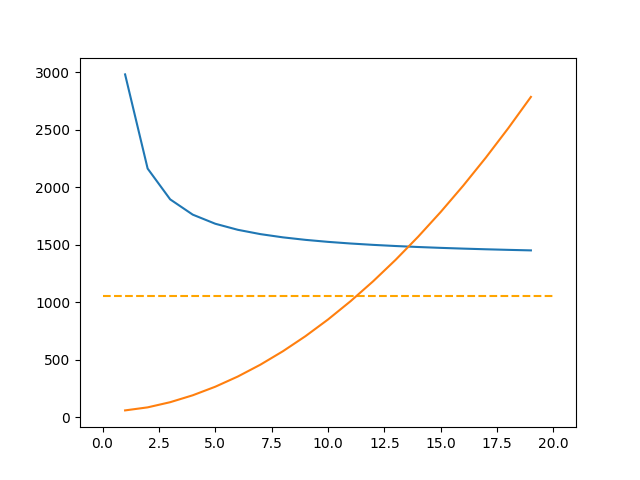

In [25]:
%matplotlib widget

from matplotlib import pyplot as plt
import pandas as pd

width = 100
height = 100
neighborNum = 8
obstacleNum = 5000

xs = list(range(1, 20))
rows = []
for x in xs:
    m = Model(processNum=x, width=width, height=height,
              neighborNum=neighborNum, obstacleNum=obstacleNum)
    rows.append([x, m.sortingNetworkSize(), m.resourceCore(), m.resourceNetwork(), m.resourceAll(), m.iterNum(), m.instCore(), m.fmax(), m.isValid(), m.calcTime()])

df = pd.DataFrame(rows, columns=["x","SNetSize","resCore","resNet","resAll","iterNum","instCore","fmax","valid","calcTime"])

print(8 * 128^2 * 10 + 8^2)
display(df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['x'], df['calcTime'])
ax.plot(df['x'], df['resAll'])
ax.hlines((8 * 128^2 * 10 + 8^2),0,20,color="orange", linestyles='dashed')





Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
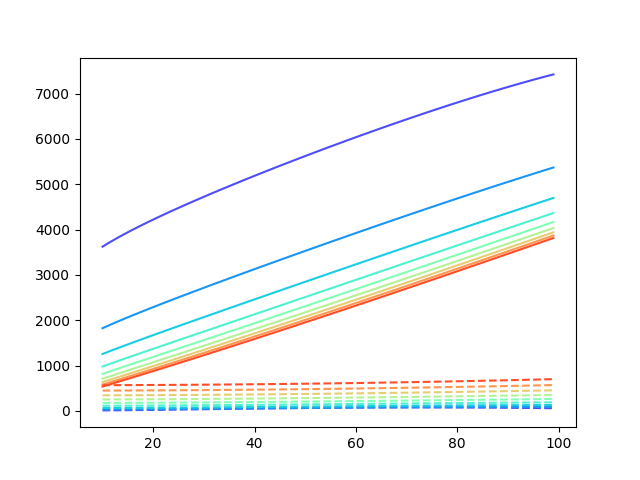

In [46]:
%matplotlib widget

from matplotlib import pyplot as plt
import pandas as pd

neighborNum = 8
obstacleRatio = 0.5

ns = list(range(1, 10))
xs = list(range(10, 100))
fig = plt.figure()
ax = fig.add_subplot(111)

for n in ns:
    rows = []
    for x in xs:
        m = Model(processNum=n, width=x, height=x,
                  neighborNum=neighborNum, obstacleNum=obstacleRatio*x*x)
        rows.append([x, m.sortingNetworkSize(), m.resourceCore(), m.resourceNetwork(), m.resourceAll(), m.iterNum(), m.instCore(), m.fmax(), m.isValid(), m.calcTime()])
    df = pd.DataFrame(rows, columns=["x","SNetSize","resCore","resNet","resAll","iterNum","instCore","fmax","valid","calcTime"])

    ax.plot(df['x'], df['calcTime']*2.5, label=str(n),c=cm.rainbow(n/10))
    ax.plot(df['x'], df['resAll'],linestyle='dashed',label=str(n),c=cm.rainbow(n/10))

# ax.hlines((8 * 128^2 * 10 + 8^2),10,19,color="orange", linestyles='dashed')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
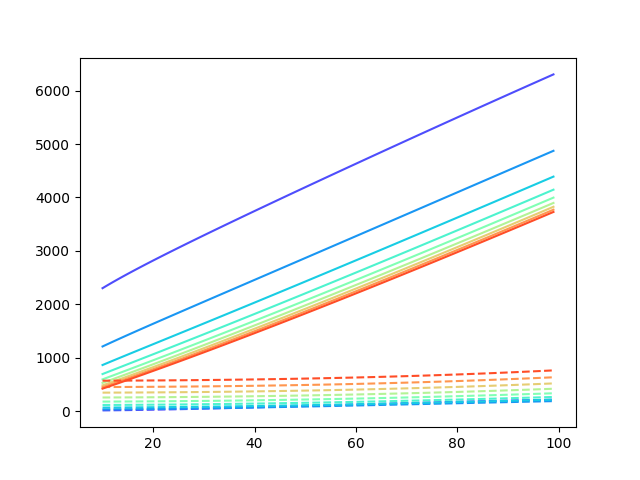

In [41]:
%matplotlib widget

from matplotlib import pyplot as plt
import pandas as pd

neighborNum = 8
obstacleRatio = 0.3

ns = list(range(1, 10))
xs = list(range(10, 100))
fig = plt.figure()
ax = fig.add_subplot(111)

for n in ns:
    rows = []
    for x in xs:
        m = Model(processNum=n, width=x, height=x,
                  neighborNum=neighborNum, obstacleNum=obstacleRatio*x*x)
        rows.append([x, m.sortingNetworkSize(), m.resourceCore(), m.resourceNetwork(), m.resourceAll(), m.iterNum(), m.instCore(), m.fmax(), m.isValid(), m.calcTime()])
    df = pd.DataFrame(rows, columns=["x","SNetSize","resCore","resNet","resAll","iterNum","instCore","fmax","valid","calcTime"])

    ax.plot(df['x'], df['calcTime']*2.5, label=str(n),c=cm.rainbow(n/10))
    ax.plot(df['x'], df['resAll'],linestyle='dashed',label=str(n),c=cm.rainbow(n/10))

# ax.hlines((8 * 128^2 * 10 + 8^2),10,19,color="orange", linestyles='dashed')